In [1]:
import pandas as pd
import numpy as np

In [2]:
from keras.datasets import imdb
(X_train, y_train),(X_test, y_test)= imdb.load_data(num_words = 1000)

In [3]:
X_train.shape

(25000,)

In [4]:
X_test.shape

(25000,)

In [5]:
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [6]:
data = np.concatenate((X_train, X_test), axis=0)
label = np.concatenate((y_train, y_test), axis=0)

In [7]:
print("Categories:", np.unique(label))
print("Number of unique words:", len(np.unique(np.hstack(data))))

Categories: [0 1]
Number of unique words: 998


In [8]:
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 234.75892
Standard Deviation: 173


In [9]:
print("Label:", label[0])

Label: 1


In [10]:
print(data[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [11]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] )
print(decoded) 

# this film was just brilliant casting # # story direction # really # the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same # # as myself so i loved the fact there was a real # with this film the # # throughout the film were great it was just brilliant so much that i # the film as soon as it was released for # and would recommend it to everyone to watch and the # # was amazing really # at the end it was so sad and you know what they say if you # at a film it must have been good and this definitely was also # to the two little # that played the # of # and paul they were just brilliant children are often left out of the # # i think because the stars that play them all # up are such a big # for the whole film but these children are amazing and should be # for what they have done don't you think the whole story was so # because it was true and was # life after all that was # with us all


In [12]:
#Adding sequence to data
data = vectorize(data)
label = np.array(label).astype("float32")

In [13]:
label

array([1., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [14]:
#To plot for EDA
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='label', ylabel='count'>

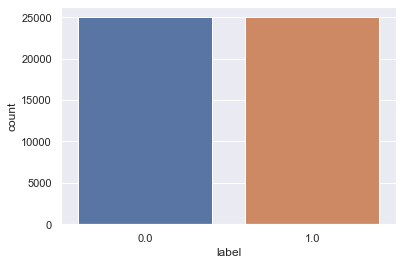

In [15]:
labelDF=pd.DataFrame({'label':label})
sns.countplot(x='label', data=labelDF)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,label, test_size=0.30, random_state=1)

In [17]:
X_train.shape

(35000, 10000)

In [18]:
X_test.shape

(15000, 10000)

In [19]:
from tensorflow.keras.utils import to_categorical
from keras import models
from keras import layers

In [20]:
model = models.Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                500050    
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 505,201
Trainable params: 505,201
Non-trai

In [21]:
#For early stopping 
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [22]:
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [23]:
results = model.fit(
 X_train, y_train,
 epochs= 20,
 batch_size = 40,
 validation_data = (X_test, y_test),
 callbacks=[callback]
)

Epoch 1/20
875/875 [==============================] - 12s 12ms/step - loss: 0.3794 - accuracy: 0.8321 - val_loss: 0.3224 - val_accuracy: 0.8599
Epoch 2/20
875/875 [==============================] - 8s 9ms/step - loss: 0.3174 - accuracy: 0.8661 - val_loss: 0.3180 - val_accuracy: 0.8631
Epoch 3/20
875/875 [==============================] - 12s 13ms/step - loss: 0.2985 - accuracy: 0.8754 - val_loss: 0.3262 - val_accuracy: 0.8587
Epoch 4/20
875/875 [==============================] - 8s 9ms/step - loss: 0.2792 - accuracy: 0.8835 - val_loss: 0.3243 - val_accuracy: 0.8596
Epoch 5/20
875/875 [==============================] - 7s 8ms/step - loss: 0.2594 - accuracy: 0.8960 - val_loss: 0.3268 - val_accuracy: 0.8610
Epoch 6/20
875/875 [==============================] - 7s 8ms/step - loss: 0.2392 - accuracy: 0.9040 - val_loss: 0.3411 - val_accuracy: 0.8579
Epoch 7/20
875/875 [==============================] - 7s 8ms/step - loss: 0.2235 - accuracy: 0.9111 - val_loss: 0.3537 - val_accuracy: 0.8561
Ep

In [24]:
print(np.mean(results.history["val_accuracy"]))

0.8523799985647201


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


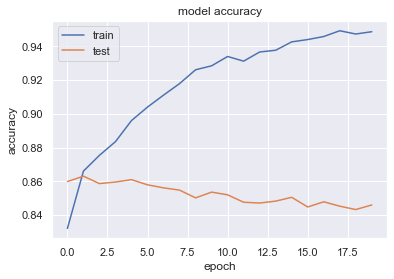

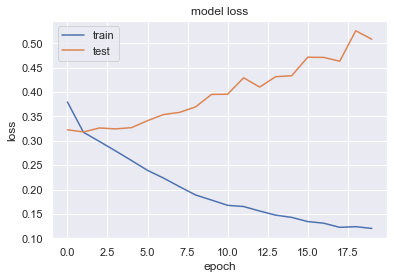

In [25]:
#Let's plot training history of our model

# list all data in history
print(results.history.keys())
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
score = model.evaluate(X_test, y_test)
print("Loss: {}, Accuracy:{}".format(score[0], score[1]))

469/469 [==============================] - 1s 3ms/step - loss: 0.5081 - accuracy: 0.8460
Loss: 0.5081206560134888, Accuracy:0.8460000157356262


In [37]:
prediction = model.predict(X_test[5].reshape((1, 10000)))
print(prediction)

[[0.9980401]]
